In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate
from scipy.integrate import ode as ode
from matplotlib import cm
from itertools import product

# Magnetique profile

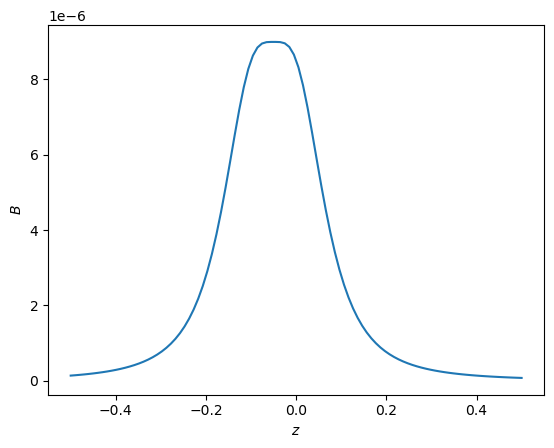

In [53]:
mu0 = 12.57 * 10 ** (-7);
I0 = 1;
R = 0.1;
a = 0.1
zmax = 0.5

def B(z):
    return (mu0 * I0 / 2) * (R ** 2 / ((R ** 2 + np.square(z)) ** (3 / 2))) +(mu0 * I0 / 2) * (R ** 2 / ((R ** 2 + np.square(z+a)) ** (3 / 2)))

z = np.linspace(-zmax, zmax, 100)

plt.plot(z, B(z))
plt.xlabel('$z$')
plt.ylabel('$B$')
plt.show()

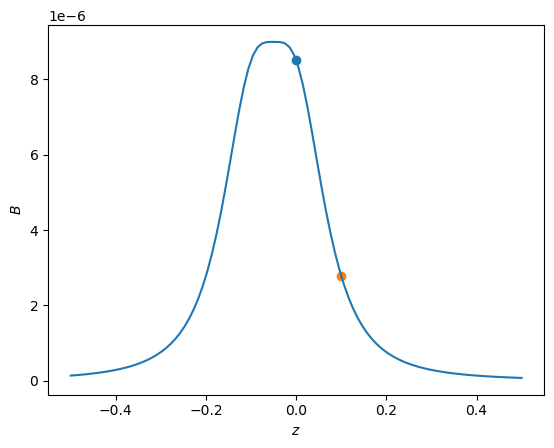

In [55]:
plt.plot(z, B(z))
plt.scatter(0, B(0))
plt.scatter(a, B(a))
plt.xlabel('$z$')
plt.ylabel('$B$')
plt.show()

# Magnetique charge

i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9


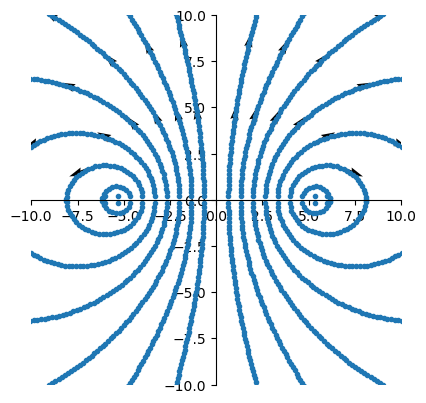

In [14]:
mu0=12.57*10**(-7);I0=1;R=5.1;xmax=10;zmax=10;pas=0.2;
k=lambda x0,z0:(2*R*x0)/(x0**2+z0**2+R**2)
C=lambda x0,z0:(mu0*I0*R)/(2*pi*(x0**2+z0**2+R**2)**(3/2))

Primitive1=lambda theta,x0,z0:(R-x0*cos(theta))/(1-k(x0,z0)*cos(theta))**(3/2)
Primitive2=lambda theta,x0,z0:cos(theta)/(1-k(x0,z0)*cos(theta))**(3/2)


def Bx(x0,z0):
    return(C(x0,z0)*z0*scipy.integrate.quad(Primitive2,0,pi,args=(x0,z0))[0])
def Bz(x0,z0):
    return(C(x0,z0)*scipy.integrate.quad(Primitive1,0,pi,args=(x0,z0))[0])

def Identite(x0,y0):
    global PointX,PointY
    PointX+=[x0];PointY=[y0]
def SymAxeX(x0,y0):
    global PointX,PointY
    PointX+=[x0,x0];PointY+=[y0,-y0]
def SymAxeY(x0,y0):
    global PointX,PointY
    PointX+=[x0,-x0];PointY+=[y0,y0]
def SymAxeYPositionQuiver(x0,y0):
    global PointXquiver,PointYquiver
    PointXquiver += [x0,-x0];PointYquiver += [y0,y0]
def SymAxeYVectorQuiver(x0,y0):
    global vectorXquiver,vectorYquiver
    vectorXquiver += [x0,-x0];vectorYquiver += [y0,y0]
def SymCentreO(x0,y0):
    global PointX,PointY
    PointX+=[x0,-x0,x0,-x0];PointY+=[y0,y0,-y0,-y0]
def Tracer():
    global PointX,PointY,PointXquiver,PointYquiver,vectorXquiver,vectorYquiver
    PointX=[];PointY=[];PointXquiver=[];PointYquiver=[];vectorXquiver=[];vectorYquiver=[];
    for i in range(1,10):
        print("i=",i)
        x0=i/1.5;z0=0;
        step=0
        while(x0<=xmax and x0>=0 and z0<=zmax and z0>=0):
            step=step+1
            tmpx=Bx(x0,z0);tmpz=Bz(x0,z0);tmp=sqrt(tmpx**2+tmpz**2);
            x0=x0+pas*tmpx/tmp;z0=z0+pas*tmpz/tmp;
            SymCentreO(x0,z0)
            if np.mod(step,20)==0:
                SymAxeYPositionQuiver(x0,z0)
                SymAxeYVectorQuiver(tmpx/tmp,tmpz/tmp)
                
Tracer()
fig=plt.figure()
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(PointX,PointY,'.')
plt.quiver(PointXquiver,PointYquiver,vectorXquiver,vectorYquiver)
plt.axis([-xmax,xmax,-zmax,zmax])
plt.savefig("champs_magnetique.png", dpi=250, bbox_inches="tight", pad_inches=0.02)
plt.show()

# Bobine Helmholz

x= 0.0  Bz= 8.994359832695151
x= 0.01  Bz= 8.993967721118583
x= 0.02  Bz= 8.987913720031171
x= 0.030000000000000006  Bz= 8.960248718747751
x= 0.04  Bz= 8.879918663096289
x= 0.05  Bz= 8.69420818487807
x= 0.06000000000000001  Bz= 8.322024510613065
x= 0.07  Bz= 7.656090185382568
x= 0.08  Bz= 6.595001686842532
x= 0.09  Bz= 5.125861871875259
x= 0.1  Bz= 3.418518087187945
i= 1
i= 2
i= 3
i= 4
i= 5
i= 6


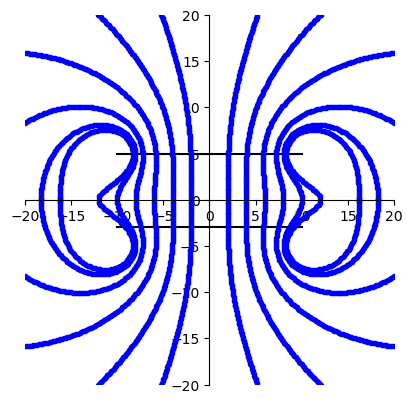

In [61]:
mu0=12.57*10**(-7);I0=1;R=0.1;
xmax=20;zmax=20;pas=0.2;
k=lambda x0,z0:(2*R*x0)/(x0**2+z0**2+R**2)
C=lambda x0,z0:(mu0*I0*R)/(2*pi*(x0**2+z0**2+R**2)**(3/2))

Primitive2=lambda theta,x0,z0:cos(theta)/(1-k(x0,z0)*cos(theta))**(3/2)
Primitive1=lambda theta,x0,z0:(R-x0*cos(theta))/(1-k(x0,z0)*cos(theta))**(3/2)

def Bx(x0,z0):
    return(C(x0,z0)*z0*scipy.integrate.quad(Primitive2,0,pi,args=(x0,z0))[0])
def Bz(x0,z0):
    return(C(x0,z0)*scipy.integrate.quad(Primitive1,0,pi,args=(x0,z0))[0])

def BxHelmoltz(x0,z0):
    return(Bx(x0,z0+a)+Bx(x0,z0-a))
def BzHelmoltz(x0,z0):
    return(Bz(x0,z0+a)+Bz(x0,z0-a))

a=R/2
Bobinex = [-10,10]
Bobiney1 = [-5,-5]
Bobiney2 = [5,5]
Bobiney3 = [-10,-10]
Bobiney4 = [10,10]

for i in range(11):
    x=R*i/10;z=0
    print("x=",x," Bz=",BzHelmoltz(x,z)*10**6)
    
def Identite(x0,y0):
    global PointX,PointY
    PointX+=[x0];PointY=[y0]
def SymAxeX(x0,y0):
    global PointX,PointY
    PointX+=[x0,x0];PointY+=[y0,-y0]
def SymAxeY(x0,y0):
    global PointX,PointY
    PointX+=[x0,-x0];PointY+=[y0,y0]
def SymCentreO(x0,y0):
    global PointX,PointY
    PointX+=[x0,-x0,x0,-x0];PointY+=[y0,y0,-y0,-y0]
def Tracer(ChampX,ChampZ,imax,zdepart,k):
    global PointX,PointY
    PointX=[];PointY=[];
    for i in range(1,imax):
        print("i=",i)
        x0=2*i;z0=zdepart;count=0
        while(x0<=xmax and x0>=0 and z0<=zmax and z0>=0 and count<500):
            count+=1
            tmpx=ChampX(x0,z0);tmpz=ChampZ(x0,z0);tmp=sqrt(tmpx**2+tmpz**2);
            x0=x0+k*pas*tmpx/tmp;z0=z0+k*pas*tmpz/tmp;
            SymCentreO(x0,z0)

def Figure():
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1, aspect='equal')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')    
    plot(Bobinex,Bobiney1,'k')
    plot(Bobinex,Bobiney2,'k')
#     plot(Bobinex,Bobiney3,'k')
#     plot(Bobinex,Bobiney4,'k')
    plt.plot(PointX,PointY,'b.')
    plt.axis([-xmax,xmax,-zmax,zmax])
    plt.savefig("bobineHelmholz.png", dpi=250, bbox_inches="tight", pad_inches=0.02)
    plt.show()

# Helmoltz
R=10;a=R/2
Tracer(BxHelmoltz,BzHelmoltz,7,0,1);Figure()

# Charge

In [25]:
class charge:
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos

def E_point_charge(q, a, x, y):  # electric field from a point charge
    return q * (x - a[0]) / ((x - a[0]) ** 2 + (y - a[1]) ** 2) ** (1.5), \
           q * (y - a[1]) / ((x - a[0]) ** 2 + (y - a[1]) ** 2) ** (1.5)


def E_total(x, y, charges):
    Ex, Ey = 0, 0
    for C in charges:
        E = E_point_charge(C.q, C.pos, x, y)
        Ex = Ex + E[0]
        Ey = Ey + E[1]
    return [Ex, Ey]

def E_dir(t, y, charges): # direction of the electric field.
    Ex, Ey = E_total(y[0], y[1], charges)
    n = np.sqrt(Ex ** 2 + Ey **2)
    return [Ex / n, Ey / n]

def V_point_charge(q, a, x, y): # electric potential field from a point charge
    return q / ((x - a[0]) ** 2 + (y - a[1]) ** 2) ** (0.5)

def V_total(x, y, charges):
    V = 0
    for C in charges:
        Vp = V_point_charge(C.q, C.pos, x, y)
        V = V + Vp
    return V

# Dipôle électrostatique

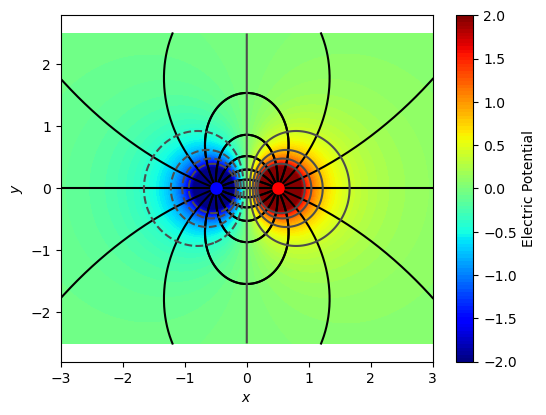

champ électrique[-0.03893279410909812, 0.10026882356360753]


In [26]:
# charges and positions
charges = [charge(-1, [-0.5, 0]),charge(1, [0.5, 0])]

# calculate field lines
x0, x1 = -3, 3
y0, y1 = -2.5, 2.5
R = 0.01
# loop over all charges
xs, ys = [], []
for C in charges:
    # plot field lines starting in current charge
    dt = 0.8 * R
    if C.q < 0:
        dt = -dt
    # loop over field lines starting in different directions
    # around current charge
    for alpha in np.linspace(0, 2 * np.pi * 15 / 16, 16):
        r = ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        x = [C.pos[0] + np.cos(alpha) * R]
        y = [C.pos[1] + np.sin(alpha) * R]
        r.set_initial_value([x[0], y[0]], 0)
        while r.successful():
            r.integrate(r.t + dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge = False
            # check if field line left drawing area or ends in some charge
            for C2 in charges:
                if np.sqrt((r.y[0] - C2.pos[0]) ** 2 + (r.y[1] - C2.pos[1]) ** 2) < R:
                    hit_charge = True
            if hit_charge or (not (x0 < r.y[0] and r.y[0] < x1)) or \
                    (not (y0 < r.y[1] and r.y[1] < y1)):
                break
        xs.append(x)
        ys.append(y)
# calculate electric potential
vvs = []
xxs = []
yys = []
numcalcv = 300
for xx, yy in product(np.linspace(x0, x1, numcalcv), np.linspace(y0, y1, numcalcv)):
    xxs.append(xx)
    yys.append(yy)
    vvs.append(V_total(xx, yy, charges))
xxs = np.array(xxs)
yys = np.array(yys)
vvs = np.array(vvs)
plt.figure(figsize=(6, 4.5), facecolor="w")

# plot field line
for x, y in zip(xs, ys):
    plt.plot(x, y, color="k")

# plot point charges
for C in charges:
    if C.q < 0:
        plt.plot(C.pos[0], C.pos[1], 'bo', ms=8 * np.sqrt(-C.q))
    if C.q > 0:
        plt.plot(C.pos[0], C.pos[1], 'ro', ms=8 * np.sqrt(C.q))

# plot electric potential
clim0, clim1 = -2, 2
vvs[np.where(vvs < clim0)] = clim0 * 0.999999  # to avoid error
vvs[np.where(vvs > clim1)] = clim1 * 0.999999  # to avoid error
plt.tricontour(xxs, yys, vvs, 10, colors="0.3")
plt.tricontourf(xxs, yys, vvs, 100, cmap=cm.jet)
cbar = plt.colorbar()
tick=np.linspace(clim0,clim1,9)
cbar.set_ticks(tick)
cbar.set_label("Electric Potential")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('equal')
plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.savefig("electric_force_lines_1.png", dpi=250, bbox_inches="tight", pad_inches=0.02)
plt.show()
print("champ électrique"+str(E_total(1,2,charges)))

# 4 charge positive

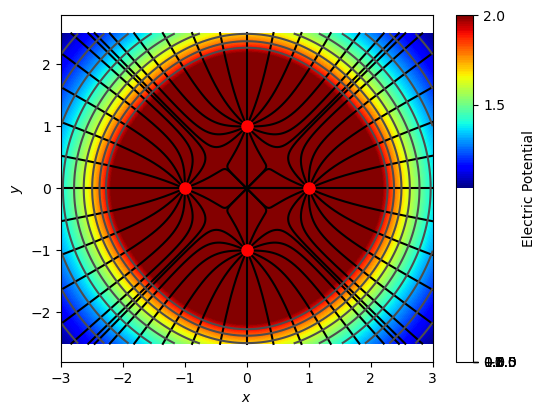

champ électrique[0.47356451484327594, 0.7868100680466437]


In [33]:
# charges and positions
charges = [charge(1, [1, 0]), charge(1, [-1, 0]), charge(1, [0, 1]), charge(1, [0, -1])]

# calculate field lines
x0, x1 = -3, 3
y0, y1 = -2.5, 2.5
R = 0.01
# loop over all charges
xs, ys = [], []
for C in charges:
    # plot field lines starting in current charge
    dt = 0.8 * R
    if C.q < 0:
        dt = -dt
    # loop over field lines starting in different directions
    # around current charge
    for alpha in np.linspace(0, 2 * np.pi * 15 / 16, 16):
        r = ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        x = [C.pos[0] + np.cos(alpha) * R]
        y = [C.pos[1] + np.sin(alpha) * R]
        r.set_initial_value([x[0], y[0]], 0)
        while r.successful():
            r.integrate(r.t + dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge = False
            # check if field line left drawing area or ends in some charge
            for C2 in charges:
                if np.sqrt((r.y[0] - C2.pos[0]) ** 2 + (r.y[1] - C2.pos[1]) ** 2) < R:
                    hit_charge = True
            if hit_charge or (not (x0 < r.y[0] and r.y[0] < x1)) or \
                    (not (y0 < r.y[1] and r.y[1] < y1)):
                break
        xs.append(x)
        ys.append(y)
# calculate electric potential
vvs = []
xxs = []
yys = []
numcalcv = 300
for xx, yy in product(np.linspace(x0, x1, numcalcv), np.linspace(y0, y1, numcalcv)):
    xxs.append(xx)
    yys.append(yy)
    vvs.append(V_total(xx, yy, charges))
xxs = np.array(xxs)
yys = np.array(yys)
vvs = np.array(vvs)
plt.figure(figsize=(6, 4.5), facecolor="w")

# plot field line
for x, y in zip(xs, ys):
    plt.plot(x, y, color="k")

# plot point charges
for C in charges:
    if C.q < 0:
        plt.plot(C.pos[0], C.pos[1], 'bo', ms=8 * np.sqrt(-C.q))
    if C.q > 0:
        plt.plot(C.pos[0], C.pos[1], 'ro', ms=8 * np.sqrt(C.q))

# plot electric potential
clim0, clim1 = -2, 2
vvs[np.where(vvs < clim0)] = clim0 * 0.999999  # to avoid error
vvs[np.where(vvs > clim1)] = clim1 * 0.999999  # to avoid error
plt.tricontour(xxs, yys, vvs, 10, colors="0.3")
plt.tricontourf(xxs, yys, vvs, 100, cmap=cm.jet)
cbar = plt.colorbar()
tick=np.linspace(clim0,clim1,9)
cbar.set_ticks(tick)
cbar.set_label("Electric Potential")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('equal')
plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.savefig("electric_force_lines_1.png", dpi=250, bbox_inches="tight", pad_inches=0.02)
plt.show()
print("champ électrique"+str(E_total(1,2,charges)))

# Condensateur

In [40]:
liste_x = np.linspace(-3, 3, 12)
charges = []
for i in liste_x:
    charges.append(charge(1, [i, 1]))
    charges.append(charge(-1, [i, -1]))

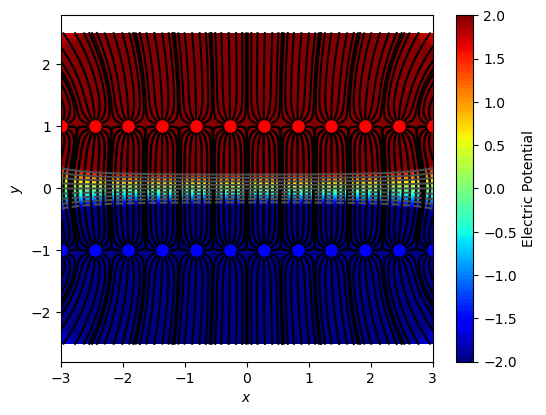

champ électrique[0.18302648050026699, 2.594793348390536]


In [41]:
# calculate field lines
x0, x1 = -3, 3
y0, y1 = -2.5, 2.5
R = 0.01
# loop over all charges
xs, ys = [], []
for C in charges:
    # plot field lines starting in current charge
    dt = 0.8 * R
    if C.q < 0:
        dt = -dt
    # loop over field lines starting in different directions
    # around current charge
    for alpha in np.linspace(0, 2 * np.pi * 15 / 16, 16):
        r = ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        x = [C.pos[0] + np.cos(alpha) * R]
        y = [C.pos[1] + np.sin(alpha) * R]
        r.set_initial_value([x[0], y[0]], 0)
        while r.successful():
            r.integrate(r.t + dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge = False
            # check if field line left drawing area or ends in some charge
            for C2 in charges:
                if np.sqrt((r.y[0] - C2.pos[0]) ** 2 + (r.y[1] - C2.pos[1]) ** 2) < R:
                    hit_charge = True
            if hit_charge or (not (x0 < r.y[0] and r.y[0] < x1)) or \
                    (not (y0 < r.y[1] and r.y[1] < y1)):
                break
        xs.append(x)
        ys.append(y)
# calculate electric potential
vvs = []
xxs = []
yys = []
numcalcv = 300
for xx, yy in product(np.linspace(x0, x1, numcalcv), np.linspace(y0, y1, numcalcv)):
    xxs.append(xx)
    yys.append(yy)
    vvs.append(V_total(xx, yy, charges))
xxs = np.array(xxs)
yys = np.array(yys)
vvs = np.array(vvs)
plt.figure(figsize=(6, 4.5), facecolor="w")

# plot field line
for x, y in zip(xs, ys):
    plt.plot(x, y, color="k")

# plot point charges
for C in charges:
    if C.q < 0:
        plt.plot(C.pos[0], C.pos[1], 'bo', ms=8 * np.sqrt(-C.q))
    if C.q > 0:
        plt.plot(C.pos[0], C.pos[1], 'ro', ms=8 * np.sqrt(C.q))

# plot electric potential
clim0, clim1 = -2, 2
vvs[np.where(vvs < clim0)] = clim0 * 0.999999  # to avoid error
vvs[np.where(vvs > clim1)] = clim1 * 0.999999  # to avoid error
plt.tricontour(xxs, yys, vvs, 10, colors="0.3")
plt.tricontourf(xxs, yys, vvs, 100, cmap=cm.jet)
cbar = plt.colorbar()
tick=np.linspace(clim0,clim1,9)
cbar.set_ticks(tick)
cbar.set_label("Electric Potential")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('equal')
plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.savefig("electric_force_lines_1.png", dpi=250, bbox_inches="tight", pad_inches=0.02)
plt.show()
print("champ électrique"+str(E_total(1,2,charges)))